In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Least squares and linear basis functions models
## Least squares

In [2]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    

    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE / MAE
    # ***************************************************
    return 1/2/len(y) *(y-tx@ w).T @ (y-tx@ w)


In [3]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    I = np.eye(len(tx.T))
    w=np.linalg.solve(tx.T @ tx, tx.T @ y)
    
    mse=compute_loss(y,tx,w)
    
    return mse,w
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [4]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    
    return least_squares(y,tx)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    

test_your_least_squares()

(15.3858878688294, array([ 73.293922  ,  13.47971243]))

## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [5]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))
#print(np.concatenate((x,y),axis=0))



shape of x (50,)
shape of y (50,)


In [6]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    poly_matrix=np.zeros([len(x),degree+1])
    for j in range (0,degree+1):
        for i in range (0,len(x)):
            poly_matrix[i,j]=np.power(x[i],j)
        
    
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    return poly_matrix



Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737467
Processing 3th experiment, degree=7, rmse=0.24965870360907189
Processing 4th experiment, degree=12, rmse=0.24077021773850665


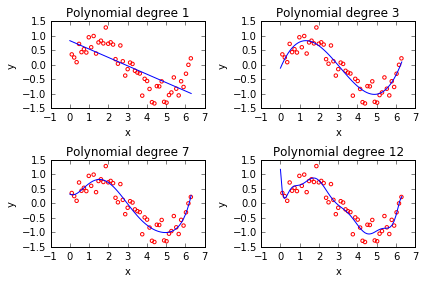

In [7]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)
    for ind, degree in enumerate(degrees):
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        
        # ***************************************************
        p=build_poly(x,degree)
        
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate rmse: TODO
        # ***************************************************
        mse,weight=least_squares(y,p)
        rmse=np.sqrt(2*mse)
        
        

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [8]:
def split_data(x, y, ratio, seed):
    """split the dataset based on the split ratio."""

    # set seed
    np.random.seed(seed)
    index=np.random.permutation(range(len(x)))
    x=x[index]
    y=y[index]
    n=int(len(x)*ratio)
    return x[:n],y[:n],x[n:],y[n:]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    


Then, test your `split_data` function below.

In [9]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    train_x,train_y,test_x,test_y=split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    p=build_poly(train_x,degree)
    p_t=build_poly(test_x,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    mse_tr,weight=least_squares(train_y,p)
    mse_te=compute_loss(test_y,p_t,weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr=np.sqrt(2*mse_tr)
    rmse_te=np.sqrt(2*mse_te)
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 68
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.453, Testing RMSE=0.644
proportion=0.9, degree=3, Training RMSE=0.252, Testing RMSE=0.326
proportion=0.9, degree=7, Training RMSE=0.242, Testing RMSE=0.348
proportion=0.9, degree=12, Training RMSE=0.229, Testing RMSE=0.385
proportion=0.5, degree=1, Training RMSE=0.405, Testing RMSE=0.590
proportion=0.5, degree=3, Training RMSE=0.238, Testing RMSE=0.306
proportion=0.5, degree=7, Training RMSE=0.204, Testing RMSE=0.529
proportion=0.5, degree=12, Training RMSE=0.203, Testing RMSE=2.231
proportion=0.1, degree=1, Training RMSE=0.222, Testing RMSE=0.516
proportion=0.1, degree=3, Training RMSE=0.121, Testing RMSE=0.379
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=1.352
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=2.240


# Ridge Regression
Please fill in the function below.

In [10]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    I = np.eye(len(tx.T))

    weight=np.linalg.solve(tx.T @ tx + lamb*I,tx.T@ y) 
    mse= 1/2/len(y)*(y-tx@ weight) @ (y-tx@ weight) 
    
    return np.sqrt(2 * mse), weight


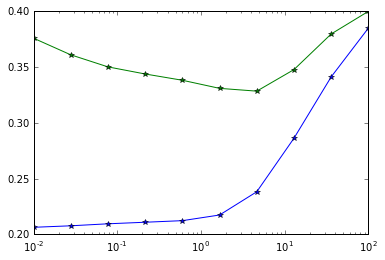

In [11]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    
    lambdas = np.logspace(-2, 2, 10)    
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    
    train_x,train_y,test_x,test_y=split_data(x, y, ratio, seed)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    p=build_poly(train_x,degree)
    p_t=build_poly(test_x,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression with different lambda: TODO
    # ***************************************************
    rmse_for_train_set=np.zeros([10])
    rmse_for_test_set=np.zeros([10])
    for ind, lamb in enumerate(lambdas):
        rmse_for_train_set[ind],weight=ridge_regression(train_y, p, lamb)
        
        rmse_for_test_set[ind]=np.sqrt(1/len(test_y)*((test_y-p_t@ weight) )@ (test_y-p_t@ weight) )
        
        
    plt.semilogx(lambdas,rmse_for_train_set,'b*-')
    plt.semilogx(lambdas,rmse_for_test_set,'g*-')
        
        ##blue one for train set
        ##green one for test set


seed = 68
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)